<a href="https://colab.research.google.com/github/kamal9010/Global-Terrorism-Analysis/blob/main/Global_Terrorism_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Global Terrorism Database (GTD) is an open-source database including information on terrorist attacks around the world from 1970 through 2017. The GTD includes systematic data on domestic as well as international terrorist incidents that have occurred during this time period and now includes more than 180,000 attacks. The database is maintained by researchers at the National Consortium for the Study of Terrorism and Responses to Terrorism (START), headquartered at the University of Maryland.</b>

# <b> Explore and analyze the data to discover key findings pertaining to terrorist activities. </b>

#  ***Importing libraries and data***

In [ ]:
#import all required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#importing the dataset 
file_path = ('/content/drive/MyDrive/Global Terrorism Data.csv')
t_data = pd.read_csv(file_path,encoding="ISO-8859-1")

In [ ]:
#checking our first 5 rows
t_data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",...,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,...,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1.0,0,NaN,NaN,1,1,1,-9.0,NaN,NaN,0.0,1,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Consulate,...,NaN,NaN,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [ ]:
#check last 5 rows
t_data.tail()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
181686,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,11,Sub-Saharan Africa,Middle Shebelle,Ceelka Geelow,2.359673,45.385034,2.0,0,The incident occurred near the town of Balcad.,12/31/2017: Assailants opened fire on a Somali...,1,1,0,1.0,1.0,Insurgency/Guerilla Action,0.0,1,0,2,Armed Assault,NaN,NaN,NaN,NaN,4,Military,36.0,Military Checkpoint,Somali National Army (SNA),Checkpoint,...,NaN,NaN,NaN,1.0,0.0,0.0,2.0,0.0,0.0,-9,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,201712310029,2017,12,31,NaN,0,NaN,200,Syria,10,Middle East & North Africa,Lattakia,Jableh,35.407278,35.942679,1.0,1,The incident occurred at the Humaymim Airport.,12/31/2017: Assailants launched mortars at the...,1,1,0,1.0,1.0,Insurgency/Guerilla Action,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,4,Military,27.0,Military Barracks/Base/Headquarters/Checkpost,Russian Air Force,Hmeymim Air Base,...,NaN,NaN,Mortars were used in the attack.,2.0,0.0,0.0,7.0,0.0,0.0,1,4.0,Unknown,-99.0,Seven military planes were damaged in this att...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,201712310030,2017,12,31,NaN,0,NaN,160,Philippines,5,Southeast Asia,Maguindanao,Kubentog,6.900742,124.437908,2.0,0,The incident occurred in the Datu Hoffer distr...,12/31/2017: Assailants set fire to houses in K...,1,1,1,0.0,NaN,NaN,0.0,1,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,14,Private Citizens & Property,76.0,House/Apartment/Residence,Not Applicable,Houses,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1,4.0,Unknown,-99.0,Houses were damaged in this attack.,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181689,201712310031,2017,12,31,NaN,0,NaN,92,India,6,South Asia,Manipur,Imphal,24.798346,93.940430,1.0,0,The incident occurred in the Mantripukhri neig...,12/31/2017: Assailants threw a grenade at a Fo...,1,1,1,0.0,NaN,NaN,0.0,0,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,2,Government (General),21.0,Government Building/Facility/Office,Forest Department Manipur,Office,...,NaN,NaN,A thrown grenade was used in the attack.,0.0,0.0,0.0,0.0,0.0,0.0,-9,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN
181690,201712310032,2017,12,31,NaN,0,NaN,160,Philippines,5,Southeast Asia,Maguindanao,Cotabato City,7.209594,124.241966,1.0,0,NaN,12/31/2017: An explosive device was discovered...,1,1,1,0.0,NaN,NaN,0.0,0,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,20,Unknown,NaN,NaN,Unknown,Unknown,...,NaN,NaN,An explosive device containing a detonating co...,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [ ]:
#dimension of our data
t_data.shape

(181691, 135)

# ***Cleaning the Data***

In [ ]:
#keep only few columns as per our requirement
terrorist_data = t_data[['iyear','imonth','iday','region_txt','country_txt','provstate','latitude','longitude','success','attacktype1_txt','targtype1_txt','target1','weaptype1_txt','gname','suicide','nkill','nwound','nkillter','summary','motive','propextent','dbsource','city']]

In [ ]:
#renaming the required columns for easy readability

terrorist_data.rename(columns = {'iyear':'year','imonth':'month','iday':'day','region_txt':'region','country_txt':'country','provstate':'province','attacktype1_txt':'attack_type','targtype1_txt':'target_type','target1':'target','weaptype1_txt':'weapon_type','gname':'terror_group','nkill':'killed','nwound':'wounded','nkillter':'perpetrator_kill','propextent':'propextent'},inplace = True)

In [ ]:
#check our first five rows 
terrorist_data.head()

,year,month,day,region,country,province,latitude,longitude,success,attack_type,target_type,target,weapon_type,terror_group,suicide,killed,wounded,perpetrator_kill,summary,motive,propextent,dbsource,city
0,1970,7,2,Central America & Caribbean,Dominican Republic,NaN,18.456792,-69.951164,1,Assassination,Private Citizens & Property,Julio Guzman,Unknown,MANO-D,0,1.0,0.0,NaN,NaN,NaN,NaN,PGIS,Santo Domingo
1,1970,0,0,North America,Mexico,Federal,19.371887,-99.086624,1,Hostage Taking (Kidnapping),Government (Diplomatic),"Nadine Chaval, daughter",Unknown,23rd of September Communist League,0,0.0,0.0,NaN,NaN,NaN,NaN,PGIS,Mexico city
2,1970,1,0,Southeast Asia,Philippines,Tarlac,15.478598,120.599741,1,Assassination,Journalists & Media,Employee,Unknown,Unknown,0,1.0,0.0,NaN,NaN,NaN,NaN,PGIS,Unknown
3,1970,1,0,Western Europe,Greece,Attica,37.997490,23.762728,1,Bombing/Explosion,Government (Diplomatic),U.S. Embassy,Explosives,Unknown,0,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,Athens
4,1970,1,0,East Asia,Japan,Fukouka,33.580412,130.396361,1,Facility/Infrastructure Attack,Government (Diplomatic),U.S. Consulate,Incendiary,Unknown,0,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,Fukouka


In [ ]:
#check the information of our dataframe

terrorist_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 23 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   year              181691 non-null  int64  
 1   month             181691 non-null  int64  
 2   day               181691 non-null  int64  
 3   region            181691 non-null  object 
 4   country           181691 non-null  object 
 5   province          181270 non-null  object 
 6   latitude          177135 non-null  float64
 7   longitude         177134 non-null  float64
 8   success           181691 non-null  int64  
 9   attack_type       181691 non-null  object 
 10  target_type       181691 non-null  object 
 11  target            181055 non-null  object 
 12  weapon_type       181691 non-null  object 
 13  terror_group      181691 non-null  object 
 14  suicide           181691 non-null  int64  
 15  killed            171378 non-null  float64
 16  wounded           16

In [ ]:
#lets check the number of data present in each variable
terrorist_data.count()

year                181691
month               181691
day                 181691
region              181691
country             181691
province            181270
latitude            177135
longitude           177134
success             181691
attack_type         181691
target_type         181691
target              181055
weapon_type         181691
terror_group        181691
suicide             181691
killed              171378
wounded             165380
perpetrator_kill    114733
summary             115562
motive               50561
propextent           64065
dbsource            181691
city                181257
dtype: int64

In [ ]:
#lets check the summary of our dataframe

terrorist_data.describe()

,year,month,day,latitude,longitude,success,suicide,killed,wounded,perpetrator_kill,propextent
count,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181691.000000,181691.000000,171378.000000,165380.000000,114733.000000,64065.000000
mean,2002.638997,6.467277,15.505644,23.498343,-4.586957e+02,0.889598,0.036507,2.403272,3.167668,0.508058,3.295403
std,13.259430,3.388303,8.814045,18.569242,2.047790e+05,0.313391,0.187549,11.545741,35.949392,4.199937,0.486912
min,1970.000000,0.000000,0.000000,-53.154613,-8.618590e+07,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,1991.000000,4.000000,8.000000,11.510046,4.545640e+00,1.000000,0.000000,0.000000,0.000000,0.000000,3.000000
50%,2009.000000,6.000000,15.000000,31.467463,4.324651e+01,1.000000,0.000000,0.000000,0.000000,0.000000,3.000000
75%,2014.000000,9.000000,23.000000,34.685087,6.871033e+01,1.000000,0.000000,2.000000,2.000000,0.000000,4.000000
max,2017.000000,12.000000,31.000000,74.633553,1.793667e+02,1.000000,1.000000,1570.000000,8191.000000,500.000000,4.000000


In [ ]:
#shape of our required Dataframe
terrorist_data.shape

(181691, 23)

In [ ]:
# filling null values of nkill and nwound with zero and unknowncity with unknown
terrorist_data["killed"]= terrorist_data["killed"].fillna(0)
terrorist_data["wounded"]= terrorist_data["wounded"].fillna(0)
terrorist_data["city"]=terrorist_data['city'].fillna('unknown')

***Dropping all columns with NaN values***

In [ ]:
# droping all null values in the dataset
terrorist_data=terrorist_data.dropna(axis=1)

In [ ]:
terrorist_data.head()

,year,month,day,region,country,success,attack_type,target_type,weapon_type,terror_group,suicide,killed,wounded,dbsource,city
0,1970,7,2,Central America & Caribbean,Dominican Republic,1,Assassination,Private Citizens & Property,Unknown,MANO-D,0,1.0,0.0,PGIS,Santo Domingo
1,1970,0,0,North America,Mexico,1,Hostage Taking (Kidnapping),Government (Diplomatic),Unknown,23rd of September Communist League,0,0.0,0.0,PGIS,Mexico city
2,1970,1,0,Southeast Asia,Philippines,1,Assassination,Journalists & Media,Unknown,Unknown,0,1.0,0.0,PGIS,Unknown
3,1970,1,0,Western Europe,Greece,1,Bombing/Explosion,Government (Diplomatic),Explosives,Unknown,0,0.0,0.0,PGIS,Athens
4,1970,1,0,East Asia,Japan,1,Facility/Infrastructure Attack,Government (Diplomatic),Incendiary,Unknown,0,0.0,0.0,PGIS,Fukouka


***Checking Whether null values existed or not***

In [ ]:
terrorist_data.isnull().head()

,year,month,day,region,country,success,attack_type,target_type,weapon_type,terror_group,suicide,killed,wounded,dbsource,city
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
terrorist_data.isnull().sum()

year            0
month           0
day             0
region          0
country         0
success         0
attack_type     0
target_type     0
weapon_type     0
terror_group    0
suicide         0
killed          0
wounded         0
dbsource        0
city            0
dtype: int64

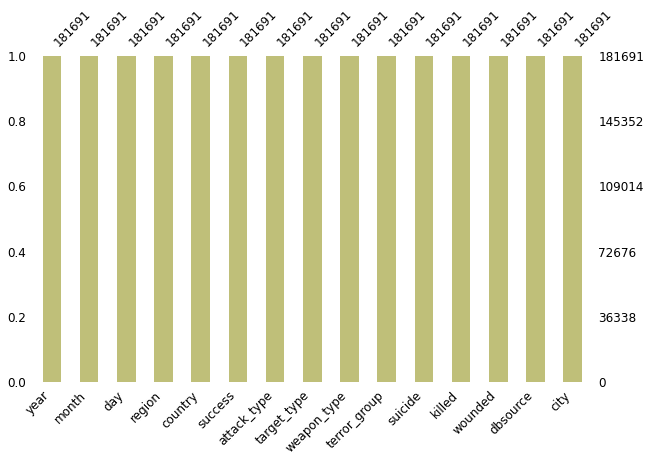

In [ ]:
# visualising the missing values
import missingno as msno

msno.bar(terrorist_data,figsize = (10,6),fontsize = 12,color = (0.75,0.75,0.475))

# ***Exploratory Data Analysis***

# correlation between  data 

In [ ]:
corr_df = terrorist_data.corr()
corr_df

,year,month,day,success,suicide,killed,wounded
year,1.000000,0.000139,0.018254,-0.082963,0.137736,0.021252,0.017484
month,0.000139,1.000000,0.005497,-0.002845,0.003071,0.004031,0.003178
day,0.018254,0.005497,1.000000,-0.011802,0.003593,-0.003225,-0.001082
success,-0.082963,-0.002845,-0.011802,1.000000,-0.031155,0.049619,0.023346
suicide,0.137736,0.003071,0.003593,-0.031155,1.000000,0.136385,0.096101
killed,0.021252,0.004031,-0.003225,0.049619,0.136385,1.000000,0.443326
wounded,0.017484,0.003178,-0.001082,0.023346,0.096101,0.443326,1.000000


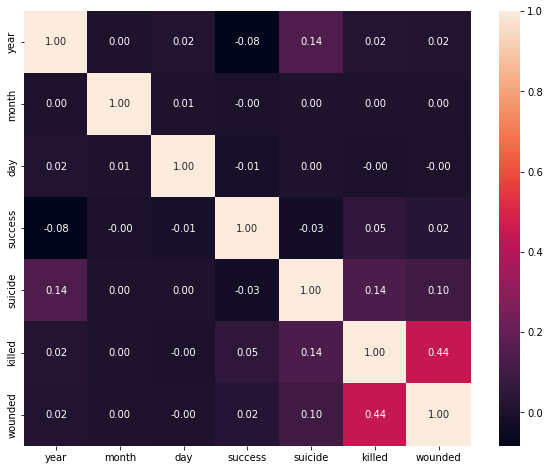

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(corr_df,fmt='0.2f',annot=True)

**From the above heatmap we can conclude that,some part of data having positive correlation,some part of data shows zero correlation, and very few data showing negative correlation.**

# **Year wise terrorist attacks**

In [ ]:
terrorist_data['year'].value_counts().reset_index()

,index,year
0,2014,16903
1,2015,14965
2,2016,13587
3,2013,12036
4,2017,10900
5,2012,8522
6,2011,5076
7,1992,5071
8,2010,4826
9,2008,4805


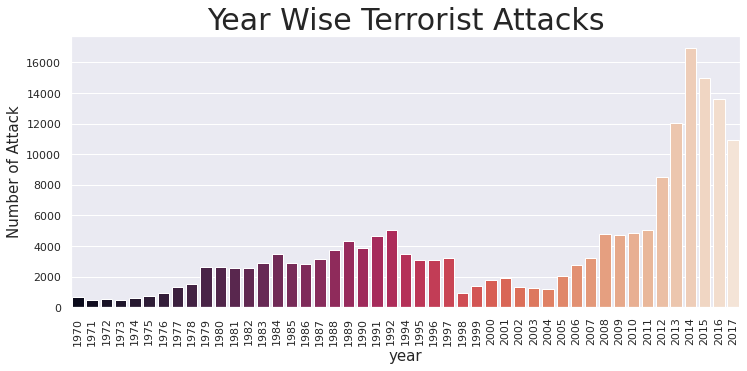

In [ ]:
plt.figure(figsize=(12,5))
sns.set_theme(style="darkgrid",context='notebook')

sns.barplot(x=terrorist_data['year'].value_counts().index,
            y=terrorist_data['year'].value_counts().values,palette='rocket')

plt.title('Year Wise Terrorist Attacks',size=30)
plt.xlabel('year',size=15)
plt.ylabel('Number of Attack',size=15)
plt.xticks(rotation=90)
plt.show()

**It's Clearly showing that, the year 2014 has the highest number of terrorist attacks and after 2004 the number of terrorist attacks started increasing.and at 1970's the number of terrorist attacks are low.**

# ***Country wise Terrorist attacks***

In [ ]:
terrorist_data['country'].value_counts().reset_index()

,index,country
0,Iraq,24636
1,Pakistan,14368
2,Afghanistan,12731
3,India,11960
4,Colombia,8306
...,...,...
200,Vatican City,1
201,North Korea,1
202,St. Lucia,1
203,Falkland Islands,1


Text(0, 0.5, 'No of attacks')

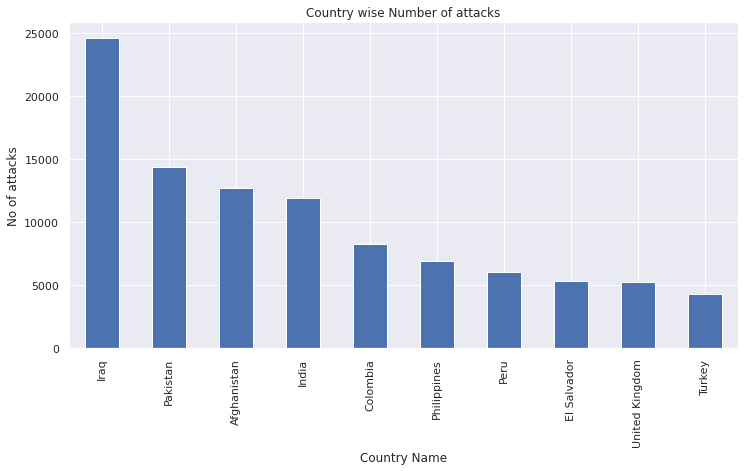

In [ ]:
plt.figure(figsize=(12,6)) 
terrorist_data['country'].value_counts()[0:10].plot(kind='bar')
plt.title("Country wise Number of attacks")
plt.xlabel("Country Name")
plt.ylabel("No of attacks")

***This plot shows top 10 terrorist affected countries and we can observe that Iraq is the most affected country following by Pakistan,Afganistan,India,Colombia,etc.***

# ***City wise Terrorist Attacks***

In [ ]:
#finding no.of attaks in cities(Top 15 cities)
terrorist_data.city.value_counts().reset_index().head(15)


,index,city
0,Unknown,9775
1,Baghdad,7589
2,Karachi,2652
3,Lima,2359
4,Mosul,2265
5,Belfast,2171
6,Santiago,1621
7,Mogadishu,1581
8,San Salvador,1558
9,Istanbul,1048


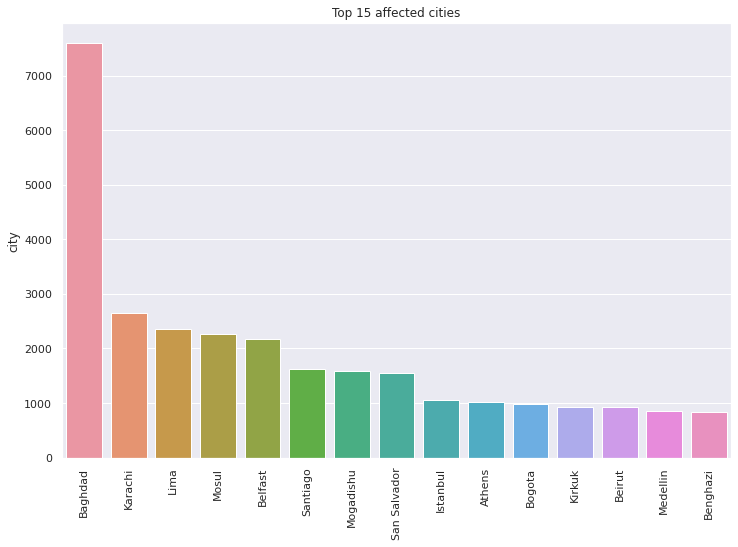

In [ ]:
#Graphical representation of city wise attacks
City=terrorist_data.city.value_counts()
City=City[1:]
plt.figure(figsize=(12,8))
City=City.head(15)
sns.barplot(City.index,City).set_title('Top 15 affected cities');
plt.xticks(rotation=90);

from the above Visualisation we can conclude that most effected city was Baghdad which was attacked 7589 times.

# ***Region wise attacks***

In [ ]:
affected_regions = terrorist_data["region"].value_counts().sort_values() 
affected_regions

Australasia & Oceania            282
Central Asia                     563
East Asia                        802
North America                   3456
Eastern Europe                  5144
Central America & Caribbean    10344
Southeast Asia                 12485
Western Europe                 16639
Sub-Saharan Africa             17550
South America                  18978
South Asia                     44974
Middle East & North Africa     50474
Name: region, dtype: int64

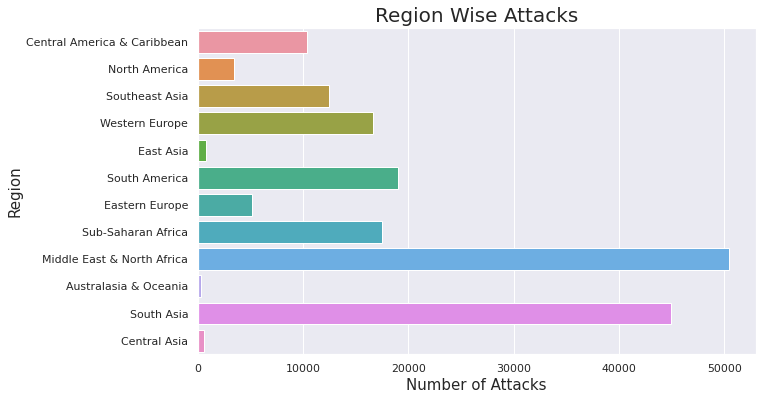

In [ ]:
plt.subplots(figsize=(10,6))
sns.countplot(y='region',data=terrorist_data)

plt.title('Region Wise Attacks',size=20)
plt.ylabel('Region',size=15)
plt.xlabel('Number of Attacks',size=15)
plt.show()

***It's clearly showing that Middle East & North Africa,South Asia Regions are  most affected regions by terrorist attacks.***

# ***Region wise Kills and Wonds***

In [ ]:
region_wise_killed=terrorist_data[["region","killed","wounded"]].groupby("region").sum().sort_values(by="killed",ascending= False)


Text(0, 0.5, 'no.of wounded')

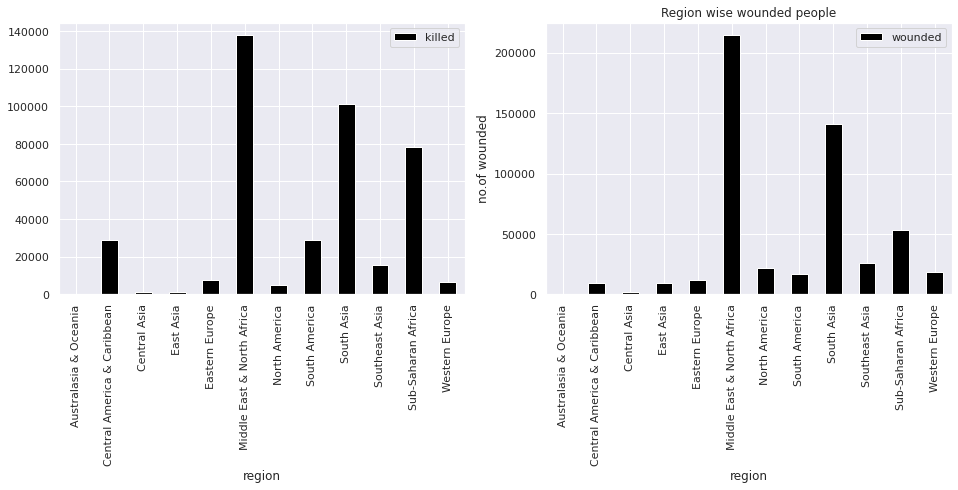

In [ ]:
fig=plt.figure()
ax0=fig.add_subplot(1,2,1)
ax1=fig.add_subplot(1,2,2)
#killed

terrorist_data[["region","killed"]].groupby("region").sum().plot(kind="bar", color="black",figsize=(16,5),ax=ax0)
plt.title("Region wise killed people")
plt.xlabel("region")
plt.ylabel("no.of killed")

#wounded
terrorist_data[["region","wounded"]].groupby("region").sum().plot(kind="bar", color="black",figsize=(16,5),ax=ax1)
plt.title("Region wise wounded people")
plt.xlabel("region")
plt.ylabel("no.of wounded")


***From the above data we can conclude that most of the people from Middle East & North Africa got killed and wounded in a high count compared to other regions*** 

# ***kills and wounds in every year***

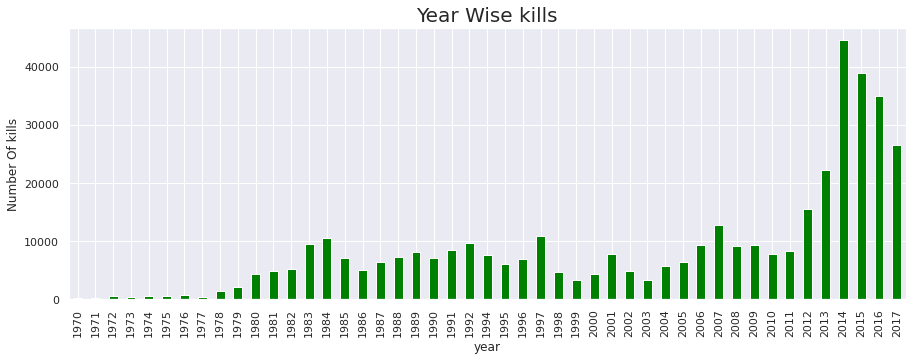

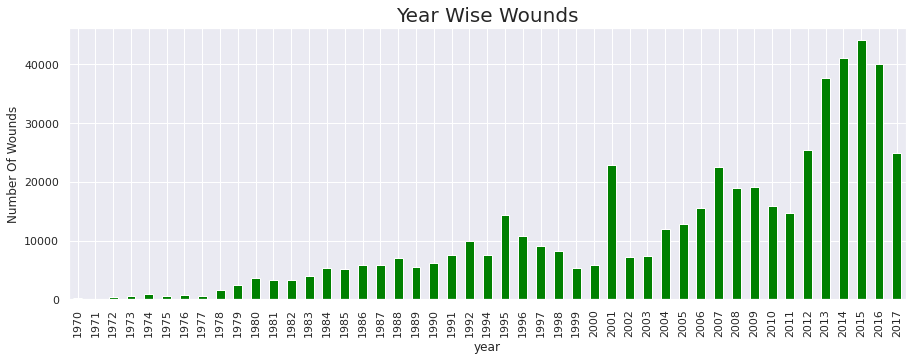

In [ ]:
#year wise kills
year_wise_kills=terrorist_data.groupby('year').killed.sum()

plt.rcParams['figure.figsize'] = (15,5)

year_wise_kills.plot(kind='bar',color='green')
plt.title('Year Wise kills',size=20)
plt.ylabel('Number Of kills')
plt.show()
# Year wise wounds
year_wise_wounds=terrorist_data.groupby('year').wounded.sum()

plt.rcParams['figure.figsize'] = (15,5)

year_wise_wounds.plot(kind='bar',color='green')
plt.title('Year Wise Wounds',size=20)
plt.ylabel('Number Of Wounds')
plt.show()



*   ***Maximum number of people killed in 2014.***

*  ***Least number of people killed in 1970 &1971.*** 





*   ***Maximum number of people got wounded in 2015.***
*   ***Least number of people got wounded in 1970 &1971.***









# ***Year wise Sucide Cases***

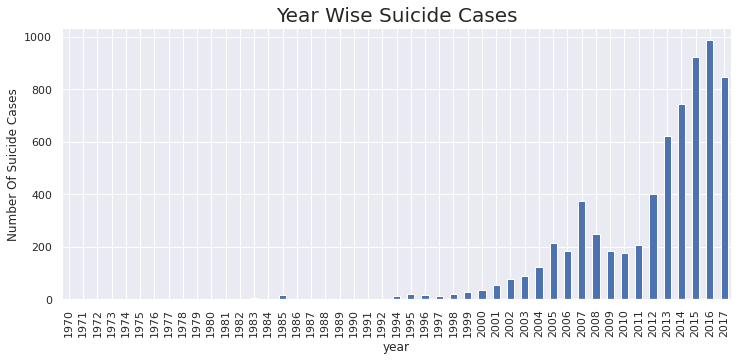

In [ ]:
year_wise_suicide=terrorist_data.groupby('year').suicide.sum()

plt.rcParams['figure.figsize'] = (12, 5)

year_wise_suicide.plot(kind='bar')
plt.title('Year Wise Suicide Cases',size=20)
plt.ylabel('Number Of Suicide Cases')
plt.show()

***It's clearly showing that the highest number of suicide cases are in the year 2016 followed by 2015,2017,2014,2013 and so on.***

# ***Type of terrorist attack***

In [ ]:
type_of_attacks=terrorist_data['attack_type'].value_counts()
type_of_attacks

Bombing/Explosion                      88255
Armed Assault                          42669
Assassination                          19312
Hostage Taking (Kidnapping)            11158
Facility/Infrastructure Attack         10356
Unknown                                 7276
Unarmed Assault                         1015
Hostage Taking (Barricade Incident)      991
Hijacking                                659
Name: attack_type, dtype: int64

In [ ]:
terrorist_data['attack_type'].value_counts().reset_index().rename(columns={'index':"type_of_attacks","attack_type":'no.of.attacks'})

,type_of_attacks,no.of.attacks
0,Bombing/Explosion,88255
1,Armed Assault,42669
2,Assassination,19312
3,Hostage Taking (Kidnapping),11158
4,Facility/Infrastructure Attack,10356
5,Unknown,7276
6,Unarmed Assault,1015
7,Hostage Taking (Barricade Incident),991
8,Hijacking,659


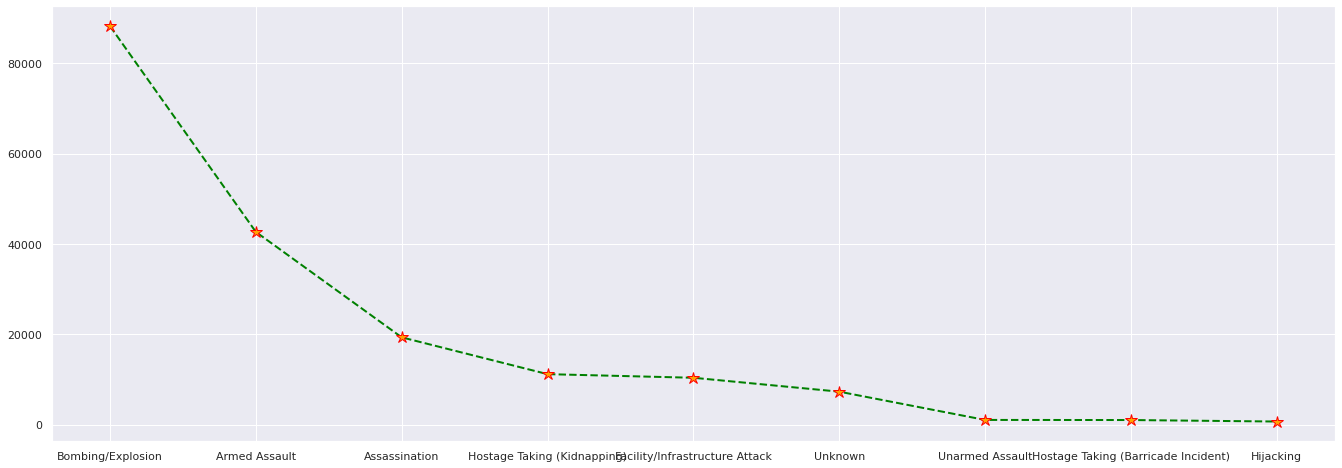

In [ ]:
plt.figure(figsize=(23,8))
type_of_attacks.plot(kind="line",color='green',ls='--',linewidth=2.00,marker='*',markersize=12,markeredgecolor='red',markerfacecolor='orange')

from the above graph we can conclude that most number of attacks from 1970 to 2017 was "Bombing/Explosion" , this type of attack was used 88255 times
Least type of attack was "Hijacking" ,it was used only 659 times

# ***Attack type used in each region*** 

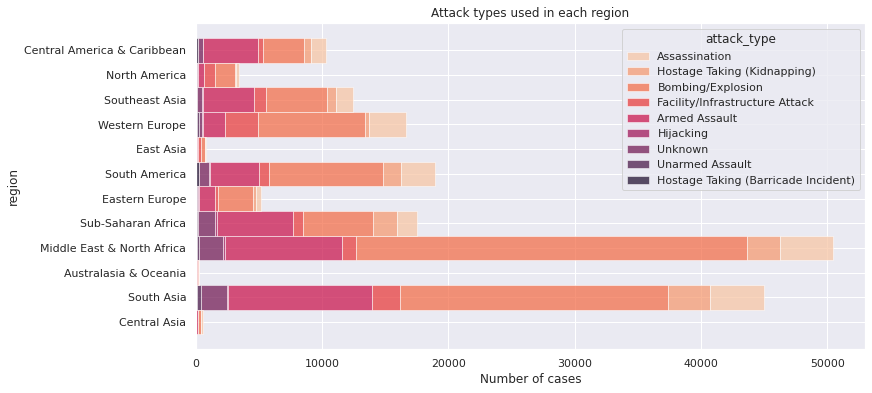

In [ ]:
#To know which attack types are used for terrorist attacks in each of the regions
plt.subplots(figsize=(12,6))
sns.set_theme(style="darkgrid")
sns.histplot(y = 'region',data = terrorist_data,hue = "attack_type",multiple="stack",palette="rocket_r",linewidth = 0.5).set(title = 'Attack types used in each region',xlabel = 'Number of cases',ylabel = 'region')
plt.xticks(rotation = 0)
plt.show()

***By observing the above plot, we conclude that most attacks were done in middle east &north africa and type of attak used most is Bombing/Explosion.***

# ***Attacks based on target type***

In [ ]:
# finding terrorist attack and their target type
target_type=terrorist_data[["target_type"]]
target_type.value_counts()

target_type                   
Private Citizens & Property       43511
Military                          27984
Police                            24506
Government (General)              21283
Business                          20669
Transportation                     6799
Utilities                          6023
Unknown                            5898
Religious Figures/Institutions     4440
Educational Institution            4322
Government (Diplomatic)            3573
Terrorists/Non-State Militia       3039
Journalists & Media                2948
Violent Political Party            1866
Airports & Aircraft                1343
Telecommunication                  1009
NGO                                 970
Tourists                            440
Maritime                            351
Food or Water Supply                317
Abortion Related                    263
Other                               137
dtype: int64

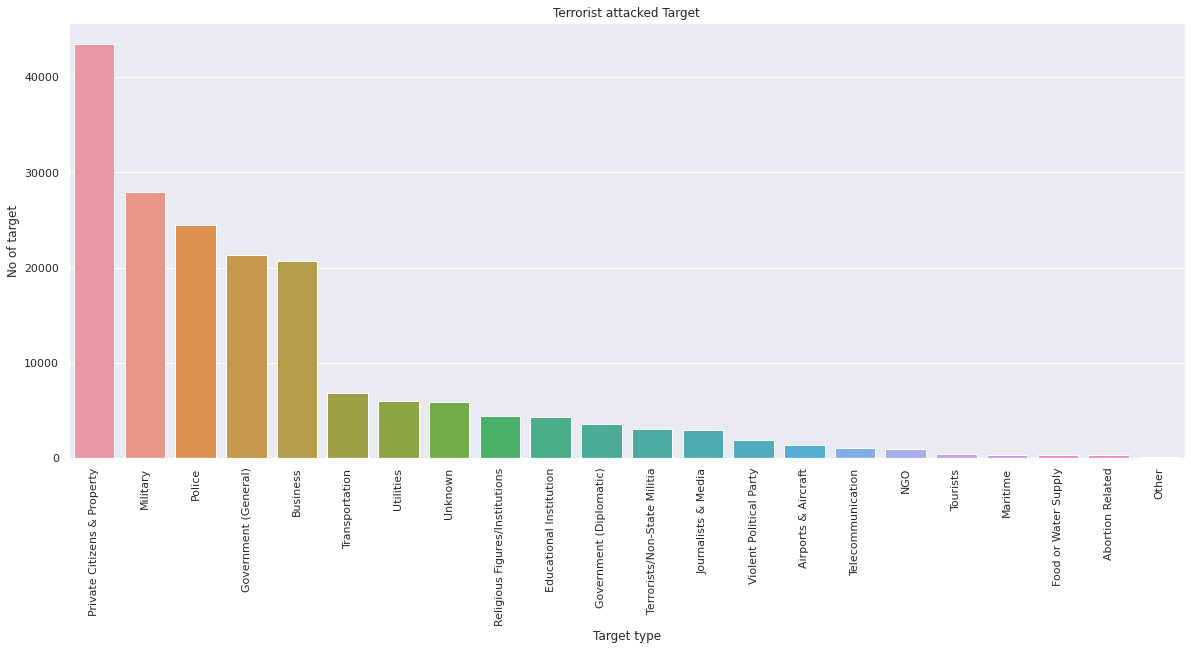

In [ ]:
plt.figure(figsize=(20,8))
sns.countplot(x=target_type.target_type, data=target_type, order=pd.value_counts(terrorist_data["target_type"]).index)
plt.xticks(rotation=90)
plt.title("Terrorist attacked Target")
plt.xlabel("Target type")
plt.ylabel("No of target")
plt.show()

***By viewing the above graph, we can conclude that main target was "Private Citizens & Property", in which they attacked 43511 times***

# ***Attacks based on weapon type***

In [ ]:
# finding type of weapons used
weapon_type=terrorist_data['weapon_type']
weapon_type.value_counts()

Explosives                                                                     92426
Firearms                                                                       58524
Unknown                                                                        15157
Incendiary                                                                     11135
Melee                                                                           3655
Chemical                                                                         321
Sabotage Equipment                                                               141
Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)      136
Other                                                                            114
Biological                                                                        35
Fake Weapons                                                                      33
Radiological                                                     

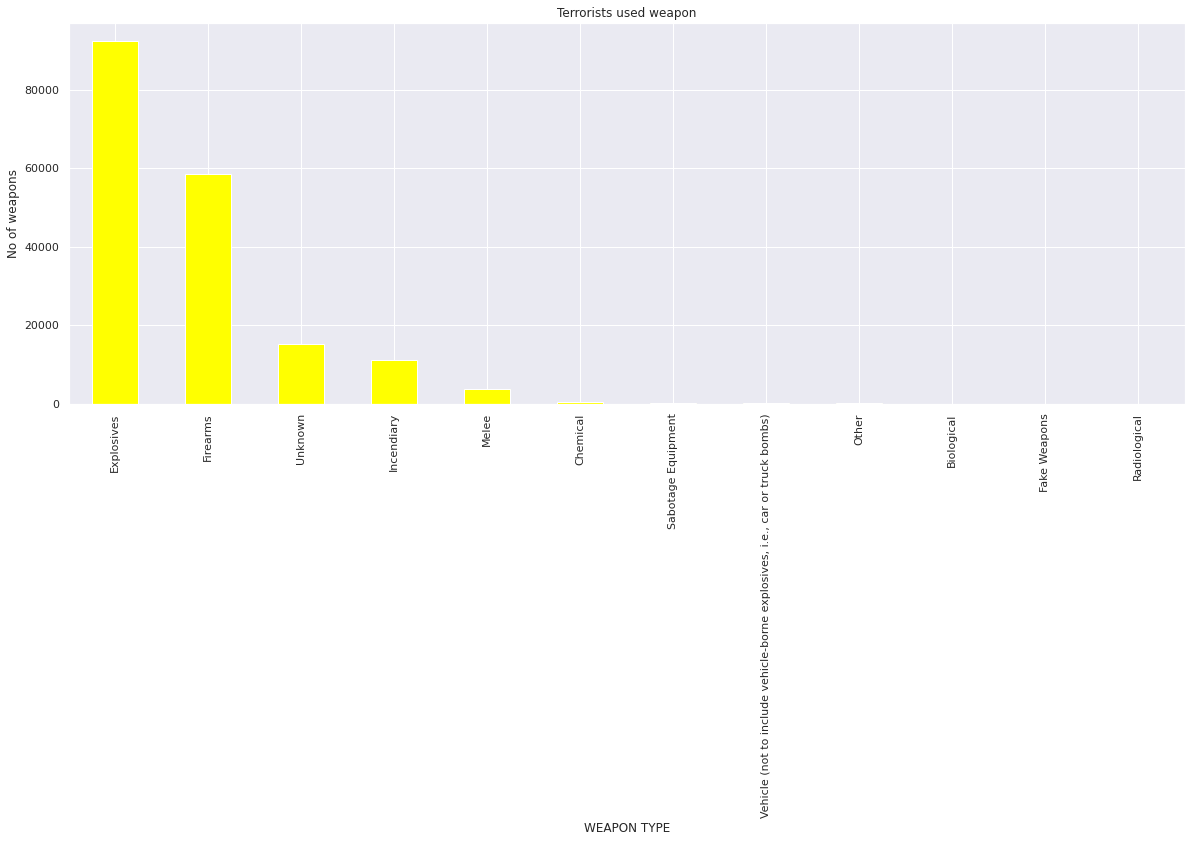

In [ ]:
plt.figure(figsize=(20,7))
weapon_type.value_counts().plot(kind='bar',color='yellow')


plt.title("Terrorists used weapon")
plt.xlabel("WEAPON TYPE")
plt.ylabel("No of weapons")
plt.show()

***from the above data we can conclude that terrorists  mostly use "Explosive"type weapons,used 92426 times and rarely used weapon was "Radiological", it was used only 14 times***

# ***Top terrorist gangs***

In [ ]:
# To know the number of attacks by each terrorist groups

Top_terrorist_groups = terrorist_data['terror_group'].value_counts()[0:20]
Top_terrorist_groups

Unknown                                             82782
Taliban                                              7478
Islamic State of Iraq and the Levant (ISIL)          5613
Shining Path (SL)                                    4555
Farabundo Marti National Liberation Front (FMLN)     3351
Al-Shabaab                                           3288
New People's Army (NPA)                              2772
Irish Republican Army (IRA)                          2671
Revolutionary Armed Forces of Colombia (FARC)        2487
Boko Haram                                           2418
Kurdistan Workers' Party (PKK)                       2310
Basque Fatherland and Freedom (ETA)                  2024
Communist Party of India - Maoist (CPI-Maoist)       1878
Maoists                                              1630
Liberation Tigers of Tamil Eelam (LTTE)              1606
National Liberation Army of Colombia (ELN)           1561
Tehrik-i-Taliban Pakistan (TTP)                      1351
Palestinians  

Here it,s showing that unknown groups (we don't know the name of the groups) are in 1st position. As we don't know the name of that groups,we can't give any clarity about that proper position. So we want to plot a graph with the groups having names.

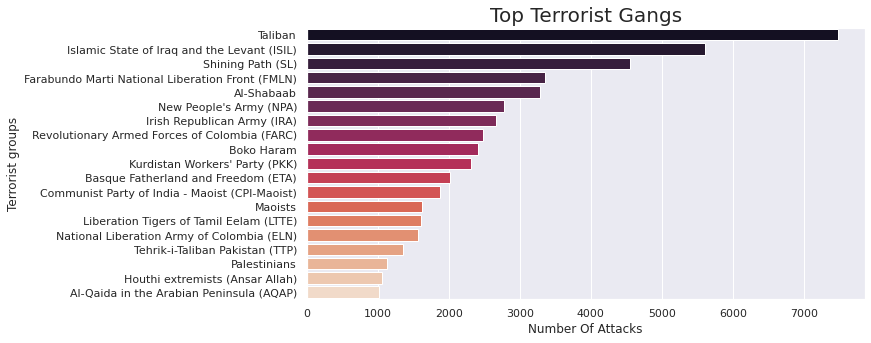

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(y=terrorist_data['terror_group'].value_counts()[1:20].index,x=terrorist_data['terror_group'].value_counts()[1:20].values,palette='rocket')
plt.title('Top Terrorist Gangs',size=20)
plt.xlabel('Number Of Attacks')
plt.ylabel('Terrorist groups')
plt.show()

***Taliban is the most dangerous gang which is in top with 7478 attacks followed by ISIL with 5163 attacks***

# ***perticular Terrorist  groups and their active regions***

In [ ]:
#we want to know which particular group is active in which region and which countries

td_division = pd.DataFrame(terrorist_data.groupby(['terror_group','country']).killed.agg(['count','sum']).sort_values('sum',ascending = False))
td_division.reset_index(inplace = True)
td_division.rename(columns = {'count':'total_cases','sum':'total_killes_wounds'},inplace = True)


final = td_division.loc[td_division['terror_group'] != 'Unknown'][:10]
final

,terror_group,country,total_cases,total_killes_wounds
1,Islamic State of Iraq and the Levant (ISIL),Iraq,4797,31058.0
2,Taliban,Afghanistan,7423,29269.0
3,Boko Haram,Nigeria,2087,16917.0
5,Shining Path (SL),Peru,4541,11595.0
6,Liberation Tigers of Tamil Eelam (LTTE),Sri Lanka,1596,10928.0
7,Al-Shabaab,Somalia,2867,8176.0
8,Farabundo Marti National Liberation Front (FMLN),El Salvador,3330,8019.0
10,Islamic State of Iraq and the Levant (ISIL),Syria,594,6883.0
11,Nicaraguan Democratic Force (FDN),Nicaragua,886,6630.0
12,Tehrik-i-Taliban Pakistan (TTP),Pakistan,1335,6014.0


In [ ]:
td_division1=pd.DataFrame(terrorist_data.groupby(['terror_group']).killed.agg(['count'])).sort_values('count',ascending = False)
td_division1[1:10]

,count
terror_group,
Taliban,7478
Islamic State of Iraq and the Levant (ISIL),5613
Shining Path (SL),4555
Farabundo Marti National Liberation Front (FMLN),3351
Al-Shabaab,3288
New People's Army (NPA),2772
Irish Republican Army (IRA),2671
Revolutionary Armed Forces of Colombia (FARC),2487
Boko Haram,2418


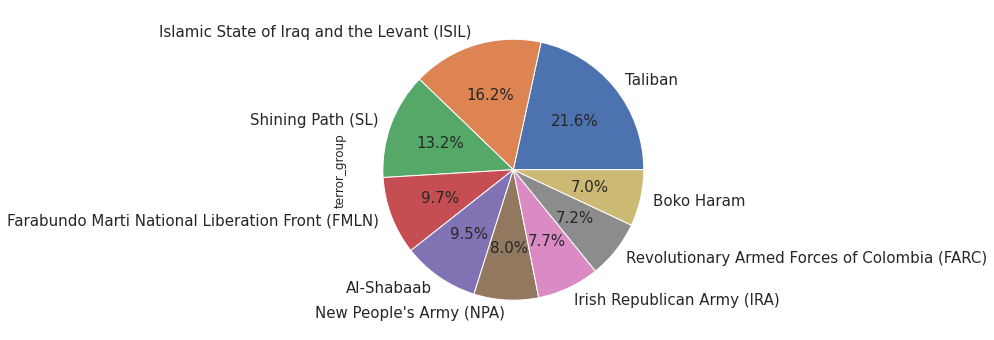

In [ ]:
plt.figure(figsize=(6,6)) 

terrorist_data['terror_group'].value_counts()[1:10].plot(kind='pie',autopct='%1.1f%%',textprops={'fontsize':15})

***Each terrorist groups are active in a specific countryof a specific region.Taliban is active in Afganistan of South Asia region,ISIL is active in Iraq of Middle East & North Africa Region,like this***

# ***CONCLUSION***




 ***From our study,we conclude that***

*  Middle East & North Africa,South Asia,South America Regions are 3 most affected regions by terrorist attacks.

*  Iraq is the most affected country following by Pakistan,Afganistan,India,Colombia,etc.
*  where as moving to cities, the baghdad was most affected city with 7589 attacks.

*  Taliban is the Most dangerous Terrorist Group.

*  The year 2014 witnessed the highest number of terrorist attack and after 2004 the number of terrorist attacks started increasing.and in 1970's no.of attacks were very low.

*  Mostly Bombing Explosion attack type is used by the terrorists.
*  Terrorists are mostly Targeting on private citizen & property,Military,police,Government,business persons,etc.
*  terrorist groups mostly use explosives,firearms,incendiary,melee for attacks
*  The highest number of suicide cases are in the year 2016 followed by 2015,2017,2014,2013 and so on.
*  The highest number of kills are done by Bombing/Explosion method in each year.


